In [51]:
import Bio
import Bio.Cluster
from Bio import SeqIO
from Bio import AlignIO
from Bio import pairwise2
from scipy.spatial import distance
import os
import json
import time
from sklearn.decomposition import PCA
import threading
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
from sklearn.cluster import SpectralClustering, DBSCAN
from sklearn.cluster import KMeans
from collections import Counter
from Bio.Cluster import distancematrix
from Bio.Phylo.TreeConstruction import DistanceCalculator
import numpy as np
import matplotlib.pyplot as plt
def hamming_distance_4(s_1, s_2):
    return sum(x != y for x, y in zip(s_1, s_2))


In [69]:
def task(file):
    sequences1=[]
    DATA_PATH = "data/DRB_filtered_reads/"
    DATA_PATH2 = "data/DRB_Matrix/"
    for record2 in SeqIO.parse(DATA_PATH + file, "fastq"):
        sequences1.append(record2.seq)
    seqs = Counter(sequences1)
    print(seqs)
    useqs = list(seqs.keys())
    usegscount= list(seqs.values())
    n = len(useqs)
    X = np.zeros((n, n))
    for i in range(n):
        for j in range(0 , i):
            X[i][j] = X[j][i] = hamming_distance_4(useqs[i], useqs[j])
    name = os.path.splitext(file)[0]
    fs= DATA_PATH2+name+".json"
    X2 = X.tolist()
    json.dump(X2,open(fs, "w"))


In [73]:
def task(file):
    sequences1=[]
    DATA_PATH = "data/DRB_filtered_reads/"
    DATA_PATH2 = "data/DRB_Matrix/"
    for record2 in SeqIO.parse(DATA_PATH + file, "fastq"):
        sequences1.append(record2.seq)
    seqs = Counter(sequences1)
    for k in seqs.copy():
        if seqs[k] == 1:
            del seqs[k]
    useqs = list(seqs.keys())
    usegscount= list(seqs.values())
    n = len(useqs)
    X = np.zeros((n, n))
    for i in range(n):
        for j in range(0 , i):
            X[i][j] = X[j][i] = hamming_distance_4(useqs[i], useqs[j])
    name = os.path.splitext(file)[0]
    fs= DATA_PATH2+name+".json"
    X2 = X.tolist()
    json.dump(X2,open(fs, "w"))


In [70]:
DATA_PATH = "data/DRB_filtered_reads/"
DATA_PATH2 = "data/DRB_Matrix/"

In [74]:
allFiles = os.listdir(DATA_PATH)
allfiles= allFiles[0:2]
for file in allfiles:
    task(file)



Counter({Seq('GGGTGCGGTACCTGGAGAGATACATCTATAACGGGCAGGAGAACGTGCGCTTCG...GAC'): 190, Seq('GGGTGCGGTTCCTGGACAGATACATCTATAACCGGGAGGAGTACGTGCGCTTCG...GAC'): 178, Seq('GGGTGCGGCTCCTGGACAGATACATCTATAACCGGGAGGAGTTCGTGCGCTTCG...GAC'): 118, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTTCGCGCGCTTCG...GAC'): 105, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTTCGCGCGCTTCG...GAC'): 35, Seq('GGGTGCGGTACCTGGAGAGATACATCTATAACGGGCAGGAGAACGTGCGCTTCG...GAC'): 4, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTTCGCGCGCTTCG...GAC'): 3, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTTCGCGCGCTTCG...GAC'): 3, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTTCGTGCGCTTCG...GAC'): 3, Seq('GGGTGCGGTTCCTGGACAGATACATCTATAACCGGGAGGAGTACGTGCGCTTCG...GAC'): 3, Seq('GGGTGCGGCTCCTGGTCAGATCCATCTATAACCGGGAGGAGTACGTGCGCTTCG...GAC'): 2, Seq('GGGTGCGGCTCCTGGACAGATACATCTATAACCGGGAGGAGTTCGTGCGCTTCG...GAC'): 2, Seq('GGGTGCGGTACCTGGAGAGATACATCTATAACGGGCAGGAGAACGTGCGCTTCG...GAC'): 2, Seq('GGGTGCGGTTCCTGGACAGATACATCTATAACCGGGAGGAG

In [60]:

H = json.load(open("data/DRB_Matrix/097_S97_L001_CS1A-URS_DRB.extendedFrags_filtered.json","r"))
H = np.array(H)
print(H)

[[ 0.  1. 15. ... 19. 18. 17.]
 [ 1.  0. 16. ... 20. 19. 18.]
 [15. 16.  0. ... 14. 18.  2.]
 ...
 [19. 20. 14. ...  0. 14. 16.]
 [18. 19. 18. ... 14.  0. 20.]
 [17. 18.  2. ... 16. 20.  0.]]


In [61]:
print(len(H))

13711


In [62]:
 pca= PCA(n_components=2, svd_solver='arpack')
S=pca.fit_transform(H)
s1, s2 = S.T



print(S)

[[ 567.62330519  347.5090905 ]
 [ 607.90014908  363.98095994]
 [ 270.10205603 -604.41342939]
 ...
 [-431.25212605 -234.34639988]
 [-458.11808246  346.78994571]
 [ 350.13435425 -571.59581179]]


13711
13711
[0 0 1 ... 2 3 1]


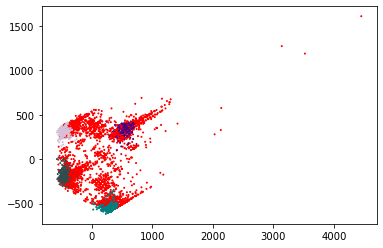

In [72]:


spectral = SpectralClustering(
        n_clusters=6,
        eigen_solver="arpack",
        assign_labels="discretize",
        affinity="precomputed_nearest_neighbors",
)


dbscan = DBSCAN(eps=2, min_samples=300, metric="precomputed")

Z= spectral.fit_predict(H)
Y  = dbscan.fit_predict(H)
print(len(H))
print(len(Y))
colors = np.array(["#4B0082","#008080","#2F4F4F","#D8BFD8","#8B4513","#808080","#FF6347","#F0F8FF","#D3D3D3","#4169E1","#DA70D6","#FFFFFF","#DB7093","#87CEEB","#F8F8FF","#FFB6C1","#FAEBD7","#9ACD32","#A9A9A9","red"])
print(Y)
plt.scatter(s1, s2, s=1, color=colors[Y])


In [18]:
l

NameError: name 'l' is not defined

In [19]:
print(S)

[[-287.75498184   14.08358564]
 [ -99.08985875 -266.53811523]
 [ 403.09719608  -36.1020556 ]
 ...
 [-260.11959022   65.45980114]
 [-258.81520871   66.2453953 ]
 [-102.34588997 -214.47287224]]


Counter({0: 1798})

In [ ]:
final_seqs